# Nury Yuleny Arosquipa Yanque
<narosqui@ime.usp.br> <br>
**Maestria en Ciencia de la Computación**<br>
**Universidade de São Paulo / Brasil - IME**<br>
**Orientador:  Prof:  Dr.  Roberto Hirata Jr**<br>
<br>

# Um Estudo Comparativo de Métodos de Segmentação de Documentos Antigos

## Mis imagenes
<img src="historical-images.jpg">

## Objetivo
<img src="binexample.png">

## Metedologia propuesta
<img src="workflow.png">

## Feature engineering
<img src="featurs_corrigido.png">

## Set
<img src="labels_totais.png">


# Analizando Clasificadores Supervisados con Scikit-Learn
## Principales Desafios en ML:
**Seleccionar un algoritmo de aprendizaje** y entrenarlo con algunos datos.
<br>
### Dos cosas pueden salir mal 
- Malos datos
    - Insuficiente cantidad de datos
    - Datos no representativos
    - ...
    - Overfitting 
    - Underfitting
    - Features irrelevantes
- **Mal algoritmo**
    - Diferentes modelos pueden encontrar distintas fronteras de decisión.

## Fronteras de decisión de los diferentes clasificadores
- Visualizar los datos que tenemos, **distribución de nuestros datos**.
<img src="example.png">

## Scikit-Learn: Comparación de clasificadores
https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-download-auto-examples-classification-plot-classifier-comparison-py
- **Objetivo:** Ilustrar la naturaleza de las fronteras de decisión de diferentes clasificadores.
- 10 classificadores usando datos sinteticos.
- The plots show training points in solid colors and testing points semi-transparent.

## Clasificadores

- KNeighbors Classifier (__kNN__)
- Máquinas de Vectores de Soporte Lineal (__L-SVM__)
- Máquinas de Vectores de Soporte con el kernel RBF (__RBF-SVM__)
- Random Forest (__RF__)
- Decision Tree (__DT__)
- Rede Neural MLP(__NN__)
- AdaBoost (__AB__)
- Naive Bayes (__NB__)
- Classificador Quadrático(__QDA__)

In [0]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [0]:
%matplotlib inline

## Datasets

In [0]:
from sklearn.datasets import make_moons, make_circles, make_classification

## Modelos

/home/nury/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/nury/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/nury/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


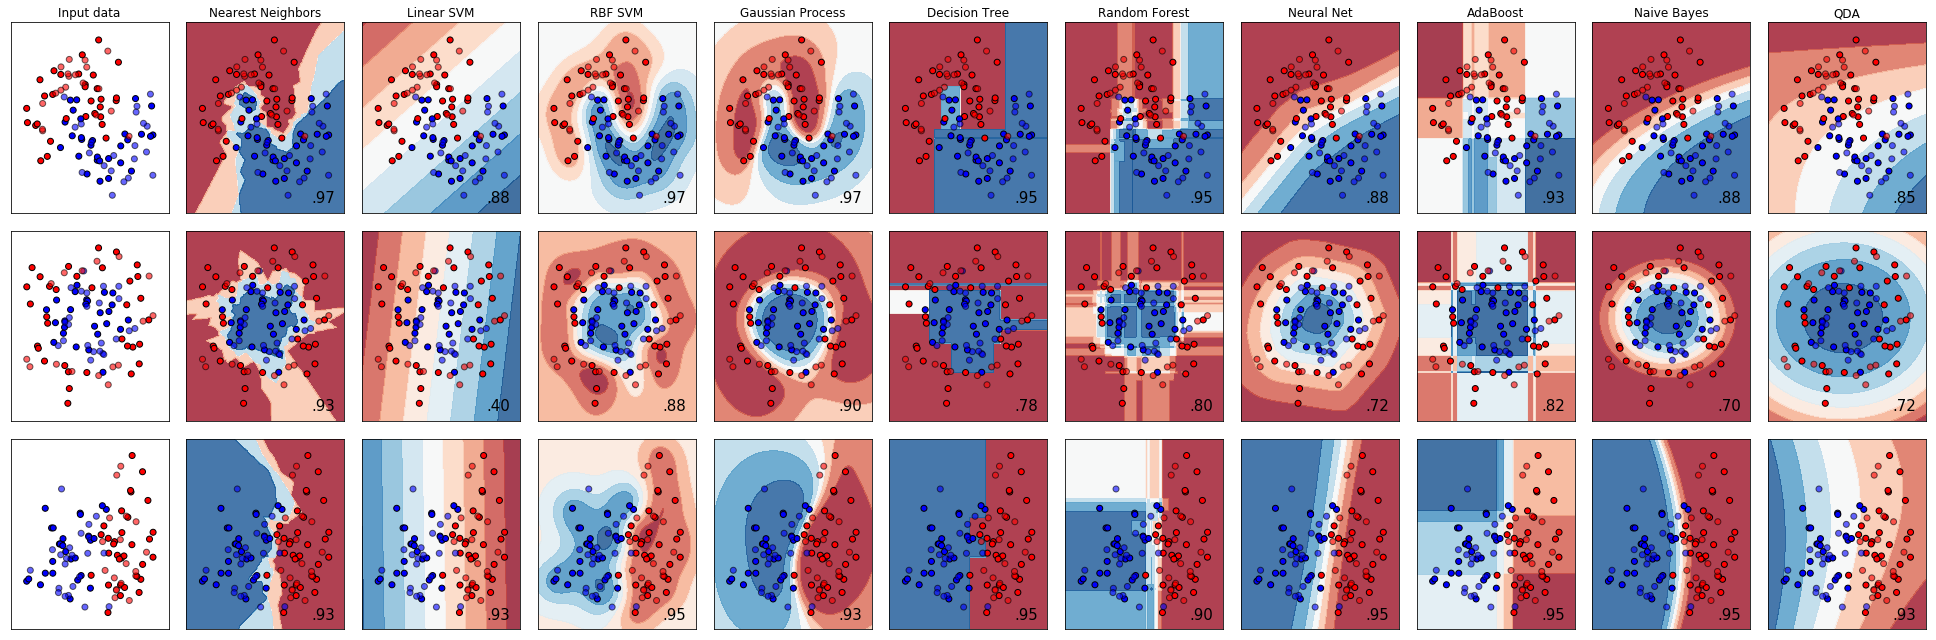

In [0]:
h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')        
        i += 1

plt.tight_layout()
plt.show()

<img src="ccls-1.png">

<img src="ccls-2.png">

<img src="ccls-3.png">

- Da una idea de qué clasificador funcionará mejor para un conjunto de datos en particular y cuál no.
- Escoger el mejor o el top 3.
    - Intenta mejorar los resultados ajustando los parámetros del clasificador.
    - Añadiendo más características al conjunto de datos.

# Primer experimento

### Balanceamiento
<img src="balanceamiento.png">

### Resultados de los clasificadores
<img src="results_clasificadores.png">

### Resultados binarización
<img src="resultado_binarizacion.png">
<img src="2016_5_quali.png">

# Segundo Experimento
<img src="linealmenteseparables.png">

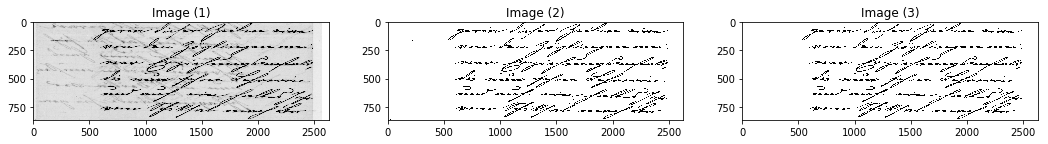

In [0]:
def show_images(images, cols = 1, titles = None):    
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
plt.show()

list_of_files = ['DIBCO20165.png', 'm3.png', 'DIBCO20165_gt.png'] 
images = []
for file in list_of_files:
    images.append(plt.imread(file, 0))
    
#showImagesHorizontally(list_of_files)
show_images(images)